<a href="https://colab.research.google.com/github/hongqin/AI4Health/blob/main/conformal_prediction_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.6112 - loss: 0.7142 - val_accuracy: 0.7500 - val_loss: 0.5181
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8083 - loss: 0.4655 - val_accuracy: 0.8813 - val_loss: 0.3792
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9167 - loss: 0.3362 - val_accuracy: 0.9125 - val_loss: 0.3135
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9166 - loss: 0.2890 - val_accuracy: 0.9187 - val_loss: 0.2605
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9315 - loss: 0.2380 - val_accuracy: 0.9062 - val_loss: 0.2303
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9474 - loss: 0.1938 - val_accuracy: 0.9438 - val_loss: 0.2027
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9520 - loss: 0.1647 - val_accuracy: 0.9375 - val_loss: 0.1880
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9611 - loss: 0.1610 - val_accuracy: 0.9563 - val_los

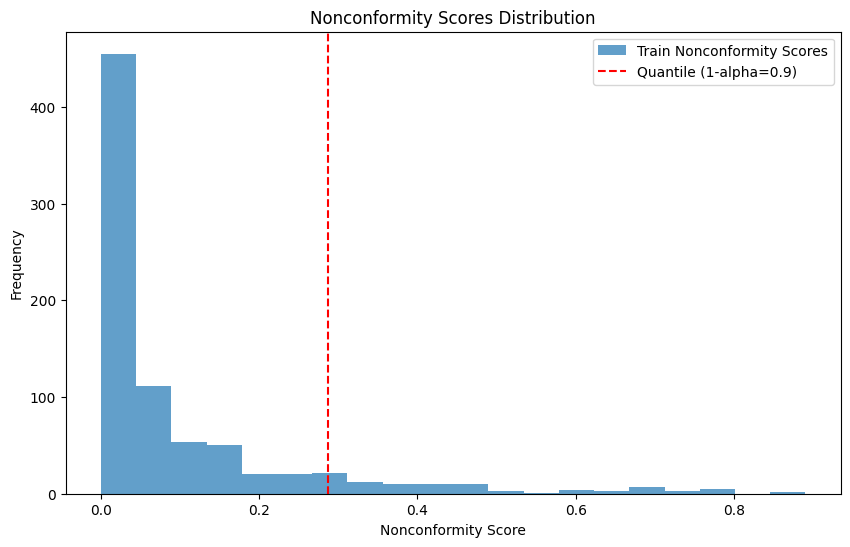

In [1]:
# Conformal Prediction with Neural Networks in Python

# Install required libraries
!pip install tensorflow scikit-learn

# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Generate a Synthetic Dataset
from sklearn.datasets import make_classification

# Generate a binary classification dataset
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42
)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build and Train a Neural Network
# Define a simple feedforward neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Step 3: Compute Nonconformity Scores
# Predict probabilities for the training data
probabilities = model.predict(X_train).flatten()

# Calculate nonconformity scores (e.g., |1 - probability| for the true class)
nonconformity_scores = np.abs(y_train - probabilities)

# Step 4: Define a Prediction Region
# Predict probabilities for the test data
test_probabilities = model.predict(X_test).flatten()

# Calculate nonconformity scores for the test data
test_nonconformity_scores = np.abs(y_test - test_probabilities)

# Define a quantile for the confidence level (e.g., 90%)
alpha = 0.1
quantile = np.quantile(nonconformity_scores, 1 - alpha)

# Create prediction regions for the test set
prediction_region = test_probabilities > quantile

# Step 5: Evaluate Prediction Regions
# Compare prediction region to actual test labels
accuracy = accuracy_score(y_test, prediction_region)

print(f"Accuracy of conformal prediction: {accuracy * 100:.2f}%")

# Step 6: Visualize Results (Optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(nonconformity_scores, bins=20, alpha=0.7, label="Train Nonconformity Scores")
plt.axvline(x=quantile, color='r', linestyle='--', label=f"Quantile (1-alpha={1-alpha})")
plt.title("Nonconformity Scores Distribution")
plt.xlabel("Nonconformity Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

